In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy import interpolate

[]

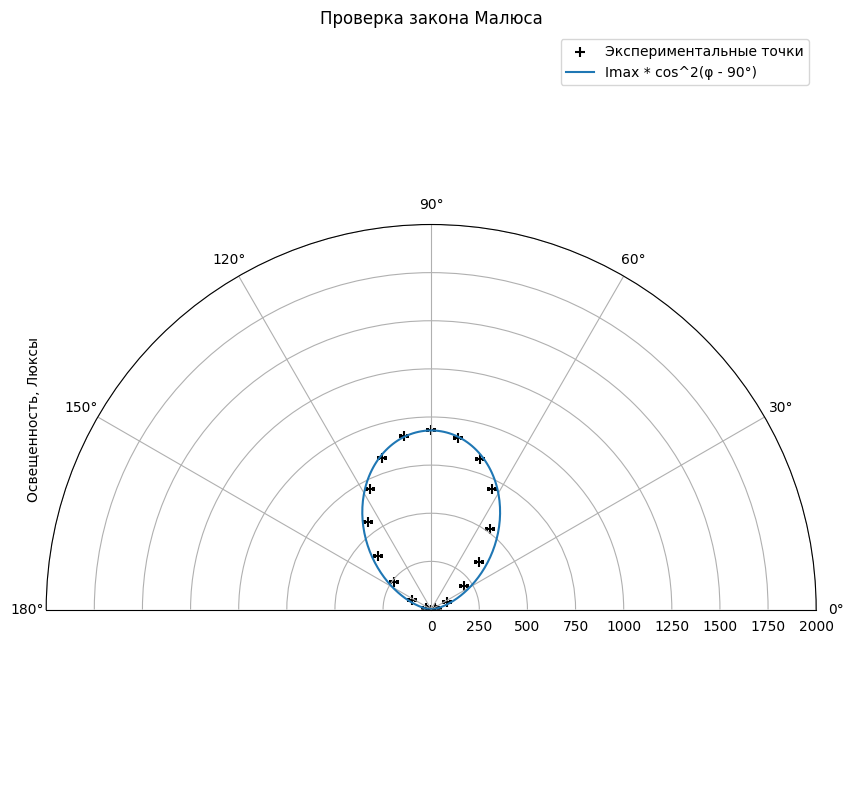

In [83]:
#поляризатор + анализатор
intensity_arr = 10**3 * np.array([0.03, 0, 0.02, 0.09, 0.21, 0.35, 0.52, 0.7, 0.82, 0.9, 0.93, 0.91, 0.83, 0.7, 0.56, 0.39, 0.24, 0.11, 0.03, 0, 0.02])
lenth = len(intensity_arr)

theta = np.linspace(0, np.pi, lenth)
teta = np.linspace(0, np.pi, 200)
# r = np.array([2, 67, 232, 477, 784, 1109, 1395, 1632, 1776, 1824, 1766, 1598, 1349, 1030, 733, 426, 190, 45, 2])

I0 = np.max(intensity_arr)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='polar')
ax.scatter(theta, intensity_arr, marker='+', color = "black", s = 45, label = "Экспериментальные точки")
ax.plot(teta, I0*np.cos(teta-np.pi/2)**2, label = "Imax * cos^2(φ - 90°)")
ax.set_title("Проверка закона Малюса")
ax.set_ylabel("Освещенность, Люксы ")
ax.set_xlim(0, np.pi)
ax.set_ylim(0,2000)
plt.legend()
plt.plot()

[]

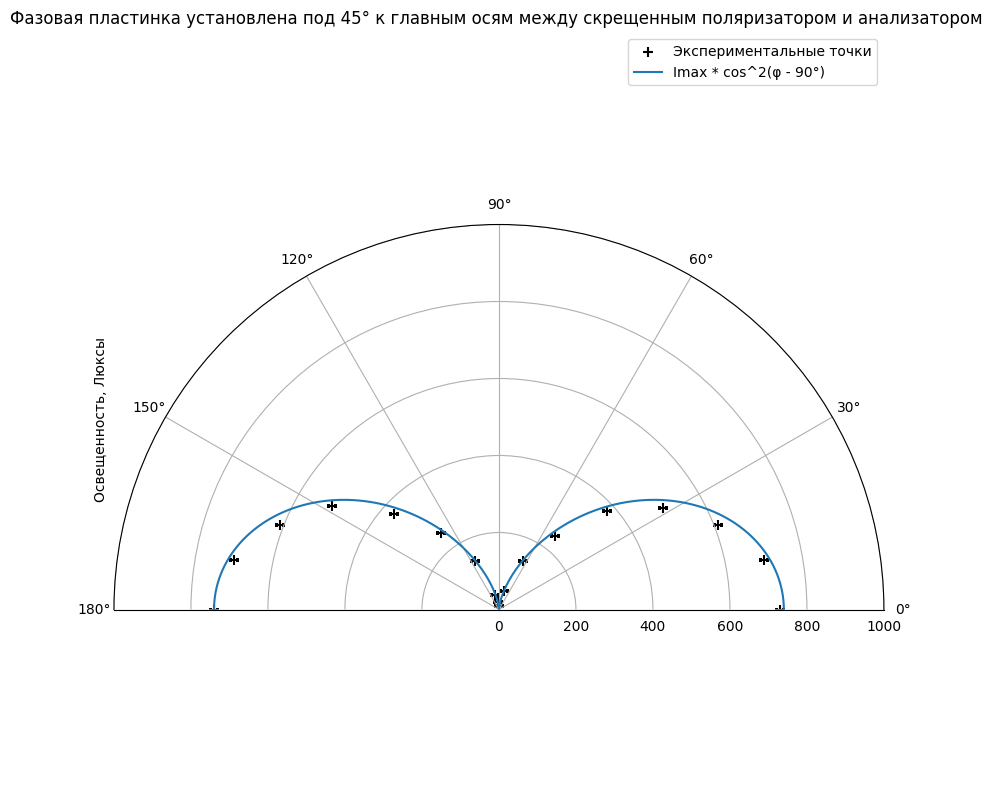

In [ ]:
#фазовая пластинка установлена под 45 к главным осям
r =  np.array([12, 54, 172, 365, 608, 862, 1103, 1300, 1436, 1495, 1456, 1342, 1158, 905, 640, 395, 192, 67, 12])

intensity_arr = 10**3 * np.array([0.73, 0.7, 0.61, 0.5, 0.38, 0.24, 0.14, 0.05, 0.01, 0.02, 0.04, 0.14, 0.25, 0.37, 0.51, 0.61, 0.7, 0.74])
lenth = len(intensity_arr)
I0 = np.max(intensity_arr)

theta = np.linspace(0, np.pi, lenth)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='polar')
ax.scatter(theta, intensity_arr, marker='+', color = "black", s = 45, label = "Экспериментальные точки")
ax.plot(teta, I0*np.cos(teta)**2, label = "Imax * cos^2(φ - 90°)")
ax.set_title("Фазовая пластинка установлена под 45° к главным осям между скрещенным поляризатором и анализатором ")
ax.set_ylabel("Освещенность, Люксы ")
ax.set_xlim(0, np.pi)
ax.set_ylim(0,1000)
plt.legend()
plt.plot()


[]

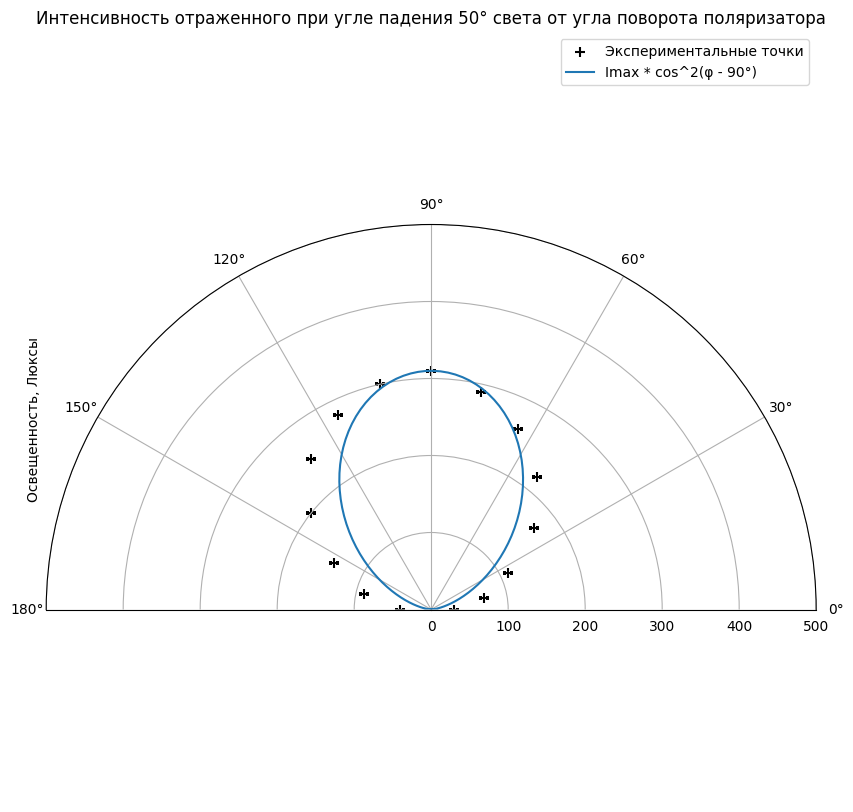

In [ ]:
#Экперименты с черным зеркалом
r = np.array([10, 19, 38, 70, 110 ,150, 190, 220, 239, 244, 237, 217, 185, 150, 109, 70, 39, 18, 10])

intensity_arr = 10**3 * np.array([0.03, 0.07, 0.11, 0.17, 0.22, 0.26, 0.29, 0.31, 0.3, 0.28, 0.25, 0.2, 0.14, 0.09, 0.04])
lenth = len(intensity_arr)
I0 = np.max(intensity_arr)

theta = np.linspace(0, np.pi, lenth)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='polar')
ax.scatter(theta, intensity_arr, marker='+', color = "black", s = 45, label = "Экспериментальные точки")
ax.plot(teta, I0*np.cos(teta-np.pi/2)**2, label = "Imax * cos^2(φ - 90°)")
ax.set_title("Интенсивность отраженного при угле падения 50° света от угла поворота поляризатора")
ax.set_ylabel("Освещенность, Люксы ")
ax.set_xlim(0, np.pi)
ax.set_ylim(0,500)
plt.legend()
plt.plot()

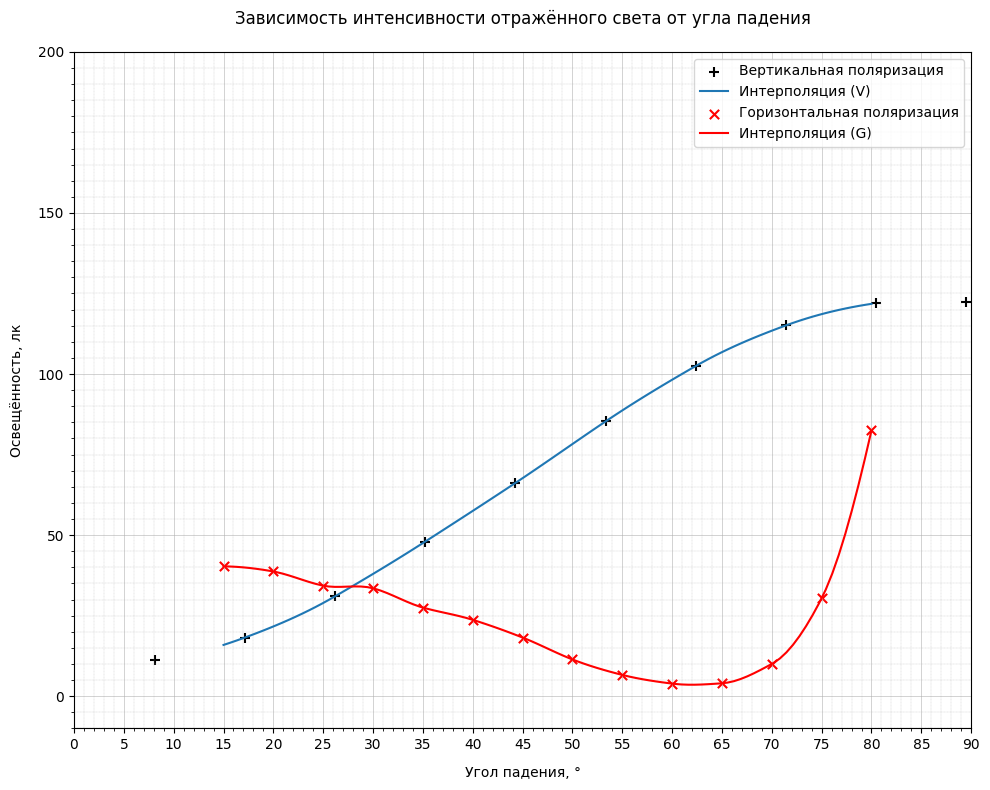

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# Данные
v = np.array([10.2, 9.5, 11.1, 18.2, 31.0, 48, 66.2, 85.3, 102.5, 115.1, 122.0, 122.2, 115.1, 101.1, 83.6, 65.4, 44, 28.2, 16, 10, 9.6, 10.9])
g = np.array([40.3, 38.7, 34.3, 33.5, 27.5, 23.7, 18.2, 11.4, 6.6, 3.9, 4.0, 10, 30.4, 82.5])

maxv = np.max(v)
maxg = np.max(g)

I0 = max(maxv, maxg)

# Углы для исходных данных
thetaV = np.linspace(-10, 180, len(v)) 
thetaG = np.linspace(15, 80, len(g)) 

# Углы для интерполяции
thetas = np.linspace(15, 80, 100)

fig, ax = plt.subplots(figsize=(10, 8))

# Вертикальная поляризация (V)
ax.scatter(thetaV, v, marker='+', color="black", s=45, label="Вертикальная поляризация")
vy_interp = interpolate.Akima1DInterpolator(thetaV, v)(thetas)
ax.plot(thetas, vy_interp, label="Интерполяция (V)")

# Горизонтальная поляризация (G)
ax.scatter(thetaG, g, marker='x', color="red", s=45, label="Горизонтальная поляризация")
gy_interp = interpolate.Akima1DInterpolator(thetaG, g)(thetas)
ax.plot(thetas, gy_interp, label="Интерполяция (G)", color="red")

# Настройки графика
ax.set_title("Зависимость интенсивности отражённого света от угла падения", pad=20)
ax.set_xlabel("Угол падения, °", labelpad=10)
ax.set_ylabel("Освещённость, лк", labelpad=10)
ax.set_xlim(0, 90)
ax.set_ylim(-10, 200)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.grid(which='minor', linestyle='--', linewidth=0.2)
ax.grid(which='major', linewidth=0.4)
ax.legend()

plt.tight_layout()
plt.show()

[]

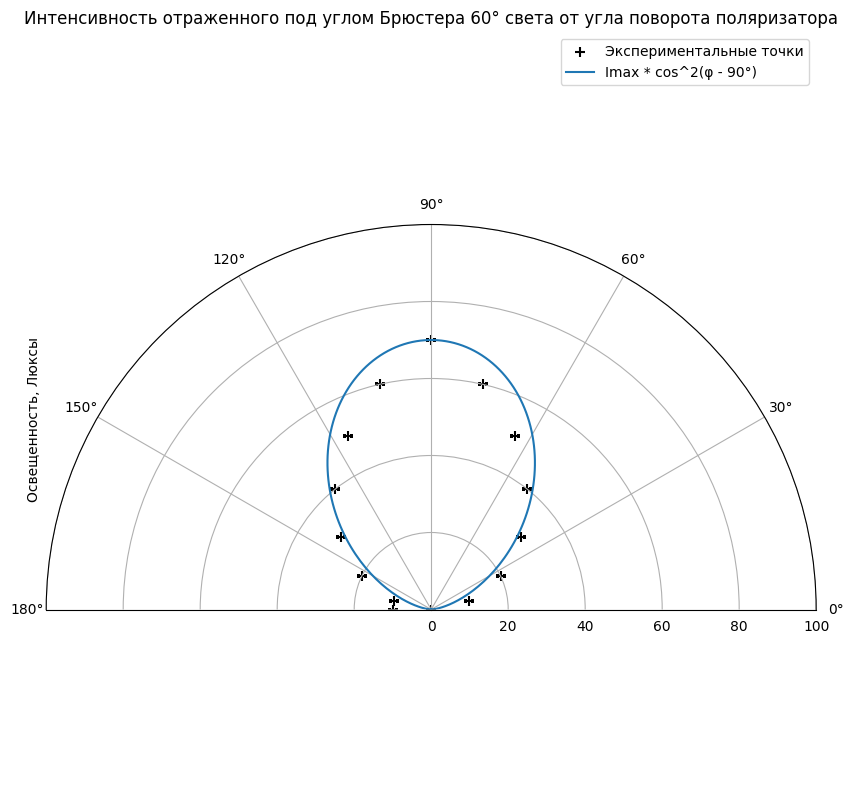

In [81]:
intensity_arr = 10**3 * np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.01])
lenth = len(intensity_arr)
I0 = max(intensity_arr)

theta = np.linspace(0, np.pi, lenth)
teta = np.linspace(0, np.pi, 200)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='polar')
ax.scatter(theta, intensity_arr, marker='+', color = "black", s = 45, label = "Экспериментальные точки")
ax.plot(teta, I0*np.cos(teta-np.pi/2)**2, label = "Imax * cos^2(φ - 90°)")
ax.set_title("Интенсивность отраженного под углом Брюстера 60° света от угла поворота поляризатора")
ax.set_ylabel("Освещенность, Люксы ")
ax.set_xlim(0, np.pi)
ax.set_ylim(0,100)
plt.legend()
plt.plot()

In [7]:
prop = 34.62/100
l = 0.2
teta1 = 10.14
teta2 = 5.44
turnang1 = teta1/l*prop
turnang2 = teta2/l*prop
print(turnang1)
print(turnang2)

17.552339999999997
9.41664
